In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import math
from sklearn.model_selection import train_test_split

Смотрим на данные и делаем предобработку 

In [2]:
data = pd.read_csv("/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head()
data.isna().mean()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

In [4]:
columns_num = ['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
columns_cat = ['BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']
target = ['Attrition']

In [5]:
for col in columns_cat:
    print(data[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Y    1470
Name: Over18, dtype: int64
No     1054
Yes     416
Name: OverTime, dtype: int64


принимает одно уникальное значение, следовательно можем удалить 

In [6]:
data = data.drop(['Over18'], axis = 1)
columns_cat.remove('Over18')

Для категориальных признаков применяем one-hot encoding

In [7]:
data = pd.get_dummies(data, columns=columns_cat)

In [8]:
columns_cat_new = []
for col_name in columns_cat:
    columns_cat_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
columns_cat = columns_cat_new

In [9]:
data['Attrition'] = data['Attrition'].replace(to_replace ="Yes", value = 1) 
data['Attrition'] = data['Attrition'].replace(to_replace ="No", value = 0) 

Надеемся на чудо, но увы

In [10]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred = lg.predict(X_test)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import f1_score
print(f1_score(y_test, pred, average='macro'))

0.45251396648044695


In [12]:
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,-0.028062,0.028062
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,-0.246118,0.246118
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,-0.009135,0.009135
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,-0.025514,0.025514
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,0.020322,-0.020322
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189,0.024037,-0.024037
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,-0.070132,0.070132
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436,0.007782,-0.007782
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253,0.003507,-0.003507


In [13]:
data = data.drop(['EmployeeCount'], axis = 1)
columns_num.remove('EmployeeCount')
data = data.drop(['StandardHours'], axis = 1)
columns_num.remove('StandardHours')

Убираем признаки, чей коэффициент корреляции с таргетом наименьшего разряда, по сравнению с остальными признаками 

In [14]:
columns_num.remove('HourlyRate')
columns_num.remove('PerformanceRating')
columns_cat.remove('JobRole_Research Scientist')

data = data.drop(['HourlyRate'], axis = 1)
data = data.drop(['PerformanceRating'], axis = 1)
data = data.drop(['JobRole_Research Scientist'], axis = 1)


делаем нормазизацию признаков

In [15]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[columns_num + columns_cat])
data[columns_num + columns_cat] = pca.transform(data[columns_num + columns_cat])

In [16]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(data[columns_num + columns_cat], data[target], train_size=0.8)
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred = lg.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

0.7460909090909091


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       242
           1       0.72      0.44      0.55        52

    accuracy                           0.87       294
   macro avg       0.80      0.70      0.74       294
weighted avg       0.86      0.87      0.86       294



# Подбор параметров 

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.01, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
lg_new = LogisticRegression()
grid = GridSearchCV(lg_new, parameters, cv=5, scoring = 'f1_macro')
grid.fit(X_train, y_train)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda3

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1]},
             scoring='f1_macro')

In [49]:
grid.cv_results_

{'mean_fit_time': array([0.01032162, 0.01179552, 0.01543837, 0.01547298, 0.01798825,
        0.01655979, 0.0173738 , 0.01950378, 0.02274776, 0.01913261]),
 'std_fit_time': array([0.00262662, 0.00037687, 0.00102202, 0.00157036, 0.00332832,
        0.00139007, 0.00110257, 0.00281804, 0.00287641, 0.00351709]),
 'mean_score_time': array([0.00418925, 0.00306478, 0.0029767 , 0.00280323, 0.00334687,
        0.00288172, 0.00341463, 0.00329299, 0.00342255, 0.0031929 ]),
 'std_score_time': array([0.0009394 , 0.0010368 , 0.00063188, 0.00034869, 0.00034364,
        0.00045665, 0.00070988, 0.00035902, 0.00037493, 0.00075337]),
 'param_C': masked_array(data=[0.01, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01},
  {'C': 0.1},
  {'C': 0.3},
  {'C': 0.4},
  {'C': 0.5},
  {'C': 0.6},
  {'C': 0.7},
  {'C': 0.8},
  {'C': 0.9

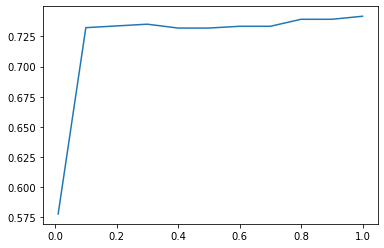

In [52]:
plt.plot(parameters['C'], grid.cv_results_['mean_test_score'])

In [53]:
grid.best_params_

{'C': 1}

# Задание №4

In [54]:
class MyLogisticRegression():
    def __init__(self, bias=True, epsilon=None):
        self.w = None
        self.bias = bias
        self.epsilon = epsilon
    
    def fit(self, X, y, max_iter=500):
        if self.epsilon == None:
            self.epsilon = 0.001
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.bias == True else k)[:, np.newaxis]
        
        if self.bias == True:
            X = np.hstack((X, np.ones((n, 1))))
    
        
        for iter_num in range(max_iter):
            y_pred = self.sigmoid(np.dot(X,self.w))

            grad = self._calc_gradient(X, y, y_pred)
            self.w -= self.epsilon * grad
        

        return self

    def predict(self, X):
        n, k = X.shape
    
        if self.bias == True:
            X = np.hstack((X, np.ones((n, 1))))

        y_pred = np.dot(X,self.w)
        for i in range(len(y_pred)):
            if y_pred[i] >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0

        return y_pred
        
    def _calc_gradient(self, X, y, y_pred):
        n, k = X.shape
        grad = (1/n) * np.dot(np.transpose(X),(y_pred - y)) 
        return grad
    
    def sigmoid(self, a):
        return  1. / (1. + np.exp(-1. * a))
    
    def get_params(self, deep=True):
        return { "epsilon": self.epsilon}
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [55]:
MyLogistic = MyLogisticRegression(bias = False)
MyLogistic.fit(X_train, y_train)
pred = MyLogistic.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

0.40674773999139047


In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'epsilon': np.geomspace(0.0001, 1, num=13)}
grid = GridSearchCV(MyLogisticRegression(), parameters, cv=5, scoring = 'f1_macro')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<__main__.MyLogisticRegression object at 0x0000020616AC0E20>,
             param_grid={'epsilon': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00])},
             scoring='f1_macro')

In [57]:
grid.cv_results_

{'mean_fit_time': array([0.17316103, 0.17186809, 0.17570519, 0.1709157 , 0.16235981,
        0.15958376, 0.15897031, 0.15912089, 0.16480112, 0.1623631 ,
        0.16158214, 0.16531701, 0.16325154]),
 'std_fit_time': array([0.0368977 , 0.01673511, 0.01256171, 0.00208476, 0.00580726,
        0.00634384, 0.00222803, 0.00493819, 0.0056352 , 0.00475592,
        0.00518806, 0.00440919, 0.00254764]),
 'mean_score_time': array([0.00162282, 0.00245409, 0.00163693, 0.00192523, 0.00184369,
        0.00179644, 0.00179029, 0.00156956, 0.00178728, 0.0017818 ,
        0.00178285, 0.00160861, 0.00166268]),
 'std_score_time': array([0.00052472, 0.00077315, 0.00049171, 0.0004879 , 0.00035488,
        0.00038297, 0.00038471, 0.0004822 , 0.00042363, 0.00039466,
        0.00039693, 0.00049958, 0.00031928]),
 'param_epsilon': masked_array(data=[0.0001, 0.00021544346900318845, 0.00046415888336127773,
                    0.001, 0.002154434690031882, 0.004641588833612777,
                    0.01, 0.0215443469

In [58]:
grid.best_params_

{'epsilon': 0.1}

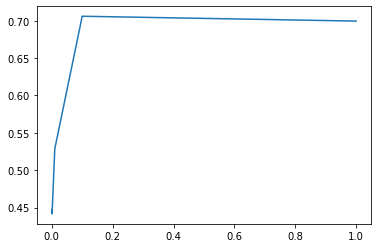

In [59]:
plt.plot([0.0001, 0.001, 0.01, 0.1, 1], grid.cv_results_['mean_test_score'][0:13:3])

# 4.3

In [60]:
from sklearn.linear_model import SGDClassifier
Classifier_SGD = SGDClassifier(loss='log')
Classifier_SGD.fit(X_train, y_train)
pred = Classifier_SGD.predict(X_test)
print(f1_score(y_test, pred, average='macro'))

0.7079624920534011


C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
